In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!rm housing.csv
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

rm: housing.csv: No such file or directory
--2023-09-20 14:19:50--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1,36M  6,79MB/s    in 0,2s    

2023-09-20 14:19:51 (6,79 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

<Axes: xlabel='median_house_value', ylabel='Count'>

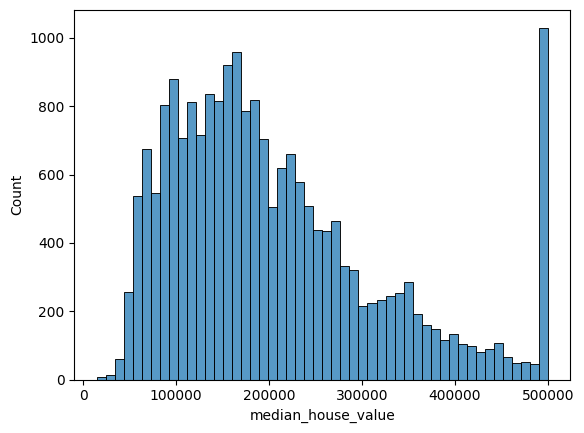

In [4]:
sns.histplot(df.median_house_value, bins=50)

# Preparing the dataset

In [5]:
df = df[df.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])]
df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]

<Axes: xlabel='median_house_value', ylabel='Count'>

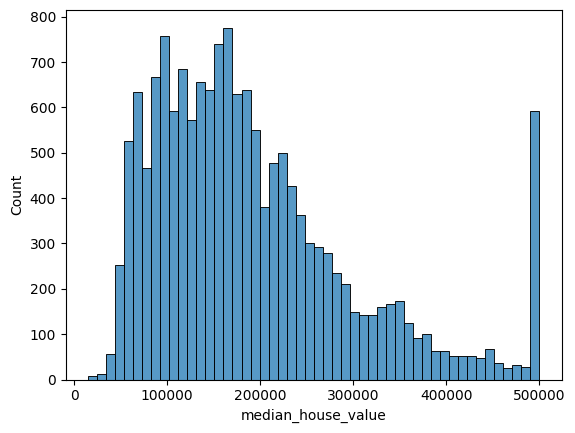

In [6]:
sns.histplot(df.median_house_value, bins=50)

In [7]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [8]:
df.population.median()

1195.0

In [9]:
df_len = len(df)
df_index = np.arange(df_len)

np.random.seed(42)
np.random.shuffle(df_index)

#df = df.iloc[df_index]
#df.head()

In [10]:
df_len_val = int(df_len * 0.2)
df_len_test = int(df_len * 0.2)
df_len_train = df_len - df_len_val - df_len_test

df_len_train, df_len_val, df_len_test

(9413, 3137, 3137)

In [11]:
df_train = df.iloc[df_index[ : df_len_train]]
df_val = df.iloc[df_index[df_len_train : df_len_train + df_len_val]]
df_test = df.iloc[df_index[df_len_train + df_len_val:]]

In [12]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [13]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [16]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [17]:
len(y_train), len(y_val), len(y_test)

(9413, 3137, 3137)

# Base Linear Regresion Model

In [18]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [19]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

# Q3 option 1

In [20]:
def prepare_X_zeros(df):
    df = df.copy()
    df.total_bedrooms = df.total_bedrooms.fillna(0)

    return df.values

In [21]:
X_train = prepare_X_zeros(df_train)

In [22]:
X_train

array([[ 3.6230e+01, -1.1914e+02,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 3.4120e+01, -1.1779e+02,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 3.3680e+01, -1.1797e+02,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 3.4130e+01, -1.1808e+02,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 3.4290e+01, -1.1846e+02,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 3.4000e+01, -1.1841e+02,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [23]:

w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_zeros(df_val)
y_pred = w0 + X_val.dot(w)
rmse_rounded = round(rmse(y_val, y_pred), 2)
rmse_rounded

0.34

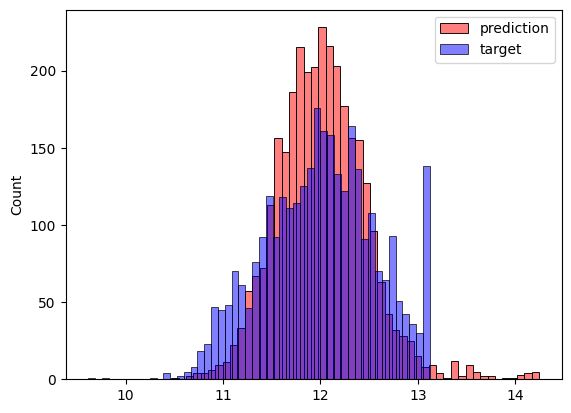

In [24]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

# Q3 option 2

In [25]:
def prepare_X_mean(df):
    df = df.copy()
    df_total_bedrooms_mean = df.total_bedrooms.mean()
    df.total_bedrooms = df.total_bedrooms.fillna(df_total_bedrooms_mean)

    return df.values

In [26]:
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)
rmse_rounded = round(rmse(y_val, y_pred), 2)
rmse_rounded

0.34

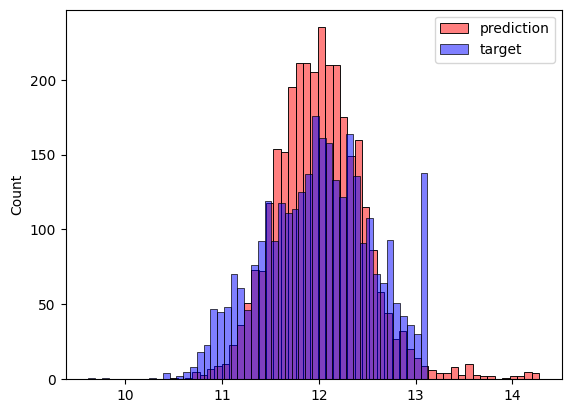

In [27]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

# Question 4. Regularisation

In [28]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X_zeros(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_zeros(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(f"{r}\t{w0}\t{score}")

0	-9.763249478052225	0.3408479034176266
1e-06	-9.763228830851833	0.3408479061831008
0.0001	-9.761185235851151	0.3408481800530155
0.001	-9.742646249818254	0.34085069219092584
0.01	-9.561056192964566	0.3408779300484923
0.1	-8.058889769570351	0.34128620419919536
1	-3.1331542783778734	0.3448958327642612
5	-0.8410867974609664	0.3477398070484778
10	-0.4381172316101039	0.3483149833518236


0 is the winner)

# Question 5, choosing seed

In [29]:
def try_seed(df_init, seed):

    df = df_init.copy()
    df_len = len(df)
    df_index = np.arange(df_len)

    np.random.seed(seed)    
    np.random.shuffle(df_index)

    df_len_val = int(df_len * 0.2)
    df_len_test = int(df_len * 0.2)
    df_len_train = df_len - df_len_val - df_len_test
    
    df_train = df.iloc[df_index[ : df_len_train]]
    df_val = df.iloc[df_index[df_len_train : df_len_train + df_len_val]]
    df_test = df.iloc[df_index[df_len_train + df_len_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = prepare_X_zeros(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X_zeros(df_val)
    y_pred = w0 + X_val.dot(w)
    
    return rmse(y_val, y_pred)

In [30]:
rmse_values = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    rmse_value = try_seed(df, seed)
    print(f"{seed}\t{rmse_value}")

    rmse_values.append(rmse_value)

0	0.3377387160082512
1	0.3377999353662671
2	0.33842870067715325
3	0.33200494683064413
4	0.3394451862555799
5	0.3433819705287994
6	0.3385330211770828
7	0.34687476972931436
8	0.3512736865968845
9	0.33415582665298454


In [31]:
rmse_value_np = np.array(rmse_values)
rmse_value_np

array([0.33773872, 0.33779994, 0.3384287 , 0.33200495, 0.33944519,
       0.34338197, 0.33853302, 0.34687477, 0.35127369, 0.33415583])

In [32]:
round(rmse_value_np.std(), 3)

0.005

# Question 6

In [33]:
def try_seed_2(df_init, seed):

    df = df_init.copy()
    df_len = len(df)
    df_index = np.arange(df_len)

    np.random.seed(seed)    
    np.random.shuffle(df_index)

    df_len_val = int(df_len * 0.2)
    df_len_test = int(df_len * 0.2)
    df_len_train = df_len - df_len_val - df_len_test
    
    df_train = df.iloc[df_index[ : df_len_train]]
    df_val = df.iloc[df_index[df_len_train : df_len_train + df_len_val]]
    df_test = df.iloc[df_index[df_len_train + df_len_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = prepare_X_zeros(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
    
    X_val = prepare_X_zeros(df_val)
    y_pred = w0 + X_val.dot(w)
    
    return rmse(y_val, y_pred)

In [34]:
try_seed(df, seed=9)

0.33415582665298454